In [178]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [179]:
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [247]:
a = load_obj('results/CD101T10_RIVAL')
b = load_obj('results/CD101T10_RIVAL_CTD')
c = load_obj('results/CD100T10')
d = load_obj('results/CD101T10')

In [248]:
acc_a, acc_b, acc_c ,acc_d = [], [], [], []
for i in range(len(a)):
    acc_a.append(a[i]['val_accuracy'])
    acc_b.append(b[i]['val_accuracy'])
    acc_c.append(c[i]['val_accuracy'])
    acc_d.append(d[i]['val_accuracy'])

f1_a, f1_b, f1_c, f1_d = [], [], [], []
for i in range(len(a)):
    f1_a.append(a[i]['f1_score'])
    f1_b.append(b[i]['f1_score'])
    f1_c.append(c[i]['f1_score'])
    f1_d.append(d[i]['f1_score'])

In [280]:
avg_precision = []
for i in range(5):
    avg_precision.append(d[i]['average_precision']['micro'])
np.mean(avg_precision), np.std(avg_precision)

(0.8524452670319584, 0.007576694318910077)

In [273]:
roc_auc=[]
for i in range(5):
    roc_auc.append(d[i]['roc_auc'][2])
np.mean(roc_auc), np.std(roc_auc)

(0.8700553882888622, 0.006823570090881012)

In [250]:
np.mean(acc_a), np.mean(acc_b),np.mean(acc_c),np.mean(acc_d)

(0.7434158325195312,
 0.7487870216369629,
 0.7583123683929444,
 0.7667829632759094)

In [249]:
[np.std(acc_a), np.std(acc_b), np.std(acc_c), np.std(acc_d)]

[0.007648259218895656,
 0.005018197303124486,
 0.005090639217615652,
 0.008107682788096307]

In [217]:
a[1]['fpr'][0]

array([0.        , 0.        , 0.        , ..., 0.98261429, 0.98261429,
       1.        ])

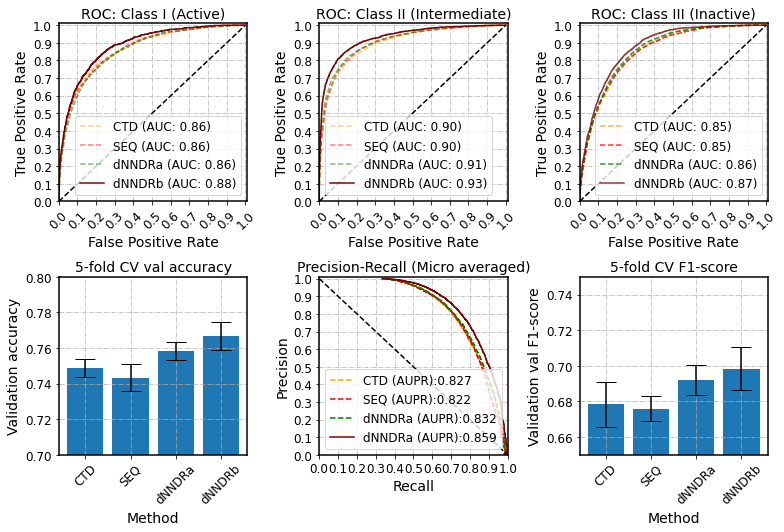

In [243]:
fig, ax = plt.subplots(2,3,figsize=(11,7.5))

#for i, activity in zip(range(3),['Active', 'Intermediate','Inactive']):

ax[0][0].plot(a[1]['fpr'][0], a[1]['tpr'][0], '--', label='CTD (AUC: %0.2f)' % a[1]['roc_auc'][0], alpha=0.5, color='orange')
ax[0][0].plot(b[1]['fpr'][0], b[1]['tpr'][0], '--', label='SEQ (AUC: %0.2f)' % b[1]['roc_auc'][0], alpha=0.5, color='red')
ax[0][0].plot(c[1]['fpr'][0], c[1]['tpr'][0], '--', label='dNNDRa (AUC: %0.2f)' % c[1]['roc_auc'][0], alpha=0.5, color='green')
ax[0][0].plot(d[2]['fpr'][0], d[2]['tpr'][0], label='dNNDRb (AUC: %0.2f)' % d[2]['roc_auc'][0], alpha=1, color='maroon')

ax[0][0].plot([0, 1], [0, 1], 'k--')
ax[0][0].set_ylim([0.0, 1.01])
ax[0][0].set_xlim([0.0, 1.01])
ax[0][0].set_yticks(np.arange(0, 1.1, 0.1))
ax[0][0].set_xticks(np.arange(0, 1.1, 0.1))
ax[0][0].set_title('ROC: Class I (Active)', fontsize=14)
ax[0][0].set_xlabel('False Positive Rate', fontsize=14)
ax[0][0].set_ylabel('True Positive Rate', fontsize=14)
#ax.set_title('Receiver operating characteristic ('+train_test+')', fontsize=14)
ax[0][0].tick_params(axis="x", labelsize=12, rotation=45)
ax[0][0].tick_params(axis="y", labelsize=12) 
ax[0][0].grid(linestyle='-.', linewidth=0.7)
ax[0][0].legend(fontsize=12)

# for i, activity in zip(range(3),['Active', 'Intermediate','Inactive']):
#     ax[0][1].plot(a[0]['fpr'][i], a[0]['tpr'][i], label=activity+' (AUC: %0.2f)' % a[0]['roc_auc'][i], alpha=1)
ax[0][1].plot(a[1]['fpr'][1], a[1]['tpr'][1], '--', label='CTD (AUC: %0.2f)' % a[1]['roc_auc'][1], alpha=0.5, color='orange')
ax[0][1].plot(b[1]['fpr'][1], b[1]['tpr'][1], '--', label='SEQ (AUC: %0.2f)' % b[1]['roc_auc'][1], alpha=0.5, color='red')
ax[0][1].plot(c[1]['fpr'][1], c[1]['tpr'][1], '--', label='dNNDRa (AUC: %0.2f)' % c[1]['roc_auc'][1], alpha=0.5, color='green')
ax[0][1].plot(d[2]['fpr'][1], d[2]['tpr'][1], label='dNNDRb (AUC: %0.2f)' % d[2]['roc_auc'][1], alpha=1, color='maroon')

ax[0][1].plot([0, 1], [0, 1], 'k--')
ax[0][1].set_ylim([0.0, 1.01])
ax[0][1].set_xlim([0.0, 1.01])
ax[0][1].set_yticks(np.arange(0, 1.1, 0.1))
ax[0][1].set_xticks(np.arange(0, 1.1, 0.1))
ax[0][1].set_title('ROC: Class II (Intermediate)', fontsize=14)
ax[0][1].set_xlabel('False Positive Rate', fontsize=14)
ax[0][1].set_ylabel('True Positive Rate', fontsize=14)
#ax.set_title('Receiver operating characteristic ('+train_test+')', fontsize=14)
ax[0][1].tick_params(axis="x", labelsize=12, rotation=45)
ax[0][1].tick_params(axis="y", labelsize=12) 
ax[0][1].grid(linestyle='-.', linewidth=0.7)
ax[0][1].legend(fontsize=12)

# for i, activity in zip(range(3),['Active', 'Intermediate','Inactive']):
#     ax[1][0].plot(a[0]['fpr'][i], a[0]['tpr'][i], label=activity+' (AUC: %0.2f)' % a[0]['roc_auc'][i], alpha=1)
ax[0][2].plot(a[1]['fpr'][2], a[1]['tpr'][2], '--', label='CTD (AUC: %0.2f)' % a[1]['roc_auc'][2], alpha=0.8, color='orange')
ax[0][2].plot(b[1]['fpr'][2], b[1]['tpr'][2], '--', label='SEQ (AUC: %0.2f)' % b[1]['roc_auc'][2], alpha=0.8, color='red')
ax[0][2].plot(c[1]['fpr'][2], c[1]['tpr'][2], '--', label='dNNDRa (AUC: %0.2f)' % c[1]['roc_auc'][2], alpha=0.8, color='green')
ax[0][2].plot(d[2]['fpr'][2], d[2]['tpr'][2], label='dNNDRb (AUC: %0.2f)' % d[2]['roc_auc'][2], alpha=0.8, color='maroon')

ax[0][2].plot([0, 1], [0, 1], 'k--')
ax[0][2].set_ylim([0.0, 1.01])
ax[0][2].set_xlim([0.0, 1.01])
ax[0][2].set_yticks(np.arange(0, 1.1, 0.1))
ax[0][2].set_xticks(np.arange(0, 1.1, 0.1))
ax[0][2].set_title('ROC: Class III (Inactive)', fontsize=14)
ax[0][2].set_xlabel('False Positive Rate', fontsize=14)
ax[0][2].set_ylabel('True Positive Rate', fontsize=14)
#ax.set_title('Receiver operating characteristic ('+train_test+')', fontsize=14)
ax[0][2].tick_params(axis="x", labelsize=12, rotation=45)
ax[0][2].tick_params(axis="y", labelsize=12) 
ax[0][2].grid(linestyle='-.', linewidth=0.7)
ax[0][2].legend(fontsize=12)

ax[1][1].step(a[1]['precision']['micro'], a[1]['recall']['micro'], '--', where='post', label='CTD (AUPR):'+str(np.round(a[1]['average_precision']['micro'],3)), color='orange')
ax[1][1].step(b[1]['precision']['micro'], b[1]['recall']['micro'], '--', where='post', label='SEQ (AUPR):'+str(np.round(b[1]['average_precision']['micro'],3)), color='red')
ax[1][1].step(c[1]['precision']['micro'], c[1]['recall']['micro'], '--', where='post', label='dNNDRa (AUPR):'+str(np.round(c[1]['average_precision']['micro'],3)), color='green')
ax[1][1].step(d[2]['precision']['micro'], d[2]['recall']['micro'], where='post', label='dNNDRa (AUPR):'+str(np.round(d[2]['average_precision']['micro'],3)), color='maroon')

ax[1][1].set_xlabel('Recall', fontsize=14)
ax[1][1].set_ylabel('Precision', fontsize=14)
ax[1][1].plot([0, 1], [1, 0], 'k--')
ax[1][1].set_ylim([0.0, 1.01])
ax[1][1].set_xlim([0.0, 1.00])
ax[1][1].set_yticks(np.arange(0, 1.1, 0.1))
ax[1][1].set_xticks(np.arange(0, 1.1, 0.1))
ax[1][1].set_title('Precision-Recall (Micro averaged)', fontsize=14)
ax[1][1].tick_params(axis="x", labelsize=12)
ax[1][1].tick_params(axis="y", labelsize=12) 
ax[1][1].grid(linestyle='-.', linewidth=0.7)
ax[1][1].legend(fontsize=12)

sets = ['CTD', 'SEQ', 'dNNDRa', 'dNNDRb']
val_acc = [np.mean(acc_a), np.mean(acc_b), np.mean(acc_c), np.mean(acc_d)]
stdev = [np.std(acc_a), np.std(acc_b), np.std(acc_c), np.std(acc_d)]
ax[1][0].bar(sets, val_acc, yerr=stdev, capsize=10, align='center')
ax[1][0].set_ylim(0.7,0.8)
ax[1][0].grid(linestyle='-.', linewidth=0.7)
ax[1][0].set_xlabel('Method', fontsize=14)
ax[1][0].set_ylabel('Validation accuracy', fontsize=14)
ax[1][0].tick_params(axis="x", labelsize=12, rotation=45)
ax[1][0].tick_params(axis="y", labelsize=12)
ax[1][0].set_title('5-fold CV val accuracy', fontsize=14)

sets = ['CTD', 'SEQ', 'dNNDRa', 'dNNDRb']
val_f1 = [np.mean(f1_a), np.mean(f1_b), np.mean(f1_c), np.mean(f1_d)]
stdev = [np.std(f1_a), np.std(f1_b), np.std(f1_c), np.std(f1_d)]
ax[1][2].bar(sets, val_f1, yerr=stdev, capsize=10, align='center')
ax[1][2].set_ylim(0.65,0.75)
ax[1][2].grid(linestyle='-.', linewidth=0.7)
ax[1][2].set_xlabel('Method', fontsize=14)
ax[1][2].set_ylabel('Validation val F1-score', fontsize=14)
ax[1][2].tick_params(axis="x", labelsize=12, rotation=45)
ax[1][2].tick_params(axis="y", labelsize=12)
ax[1][2].set_title('5-fold CV F1-score', fontsize=14)

for axis in ax.flatten():
    for dir in ['top','bottom','left','right']:
        axis.spines[dir].set_linewidth(1.5)

plt.tight_layout()
plt.savefig('plots/comparision_ROC_PR_acc.png', dpi=500, format = 'png', bbox_inches='tight')